In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.shape

(1337, 7)

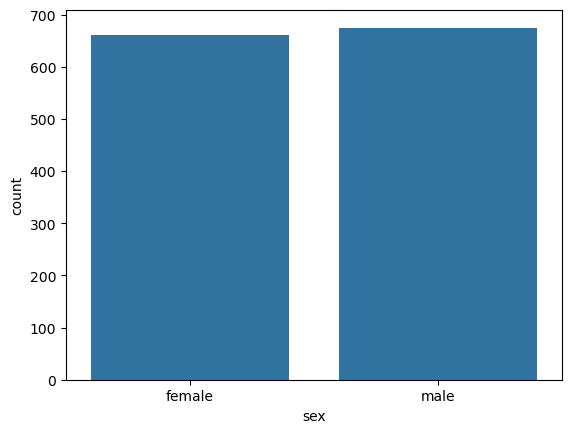

In [7]:
sns.countplot(x=data.sex)
plt.show()

<Axes: xlabel='region', ylabel='count'>

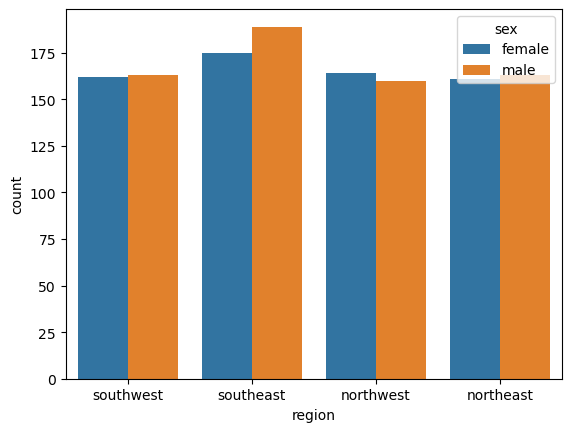

In [8]:
sns.countplot(x='region', data=data,hue='sex')

<Axes: xlabel='smoker', ylabel='count'>

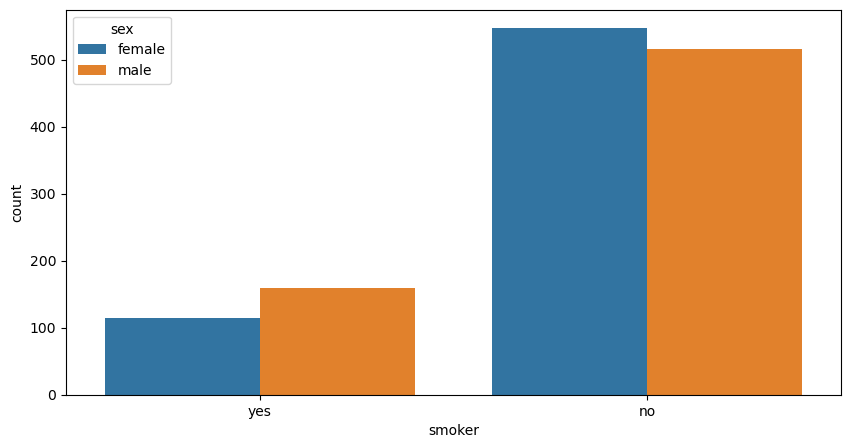

In [9]:
plt.figure(figsize=[10,5])
sns.countplot(x='smoker', data=data, hue='sex')

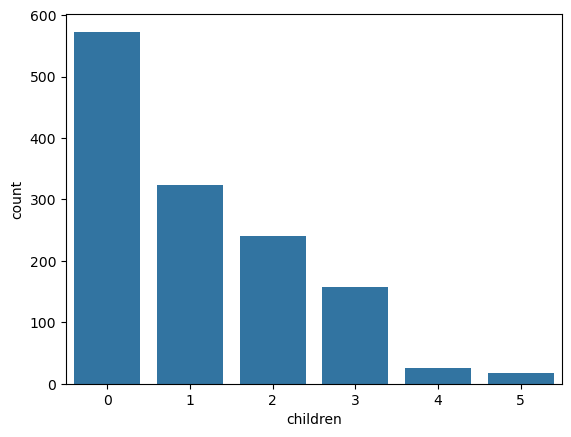

In [10]:
sns.countplot(x='children', data=data)
plt.show()

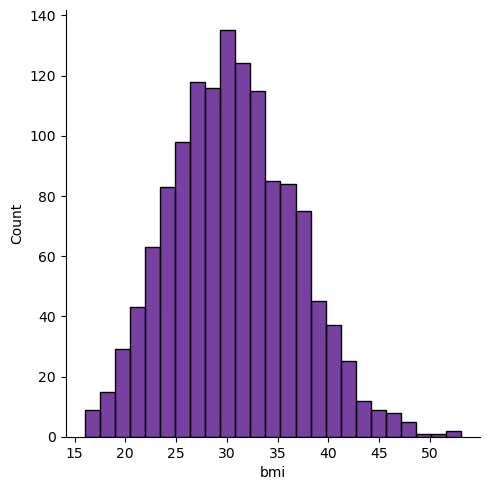

In [11]:
sns.displot(x='bmi', data=data, color='indigo')
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [13]:
num_fea = ["age","bmi","children","expenses"]
num_data = data[num_fea]
num_data.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [14]:
corr = num_data.corr()
corr

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


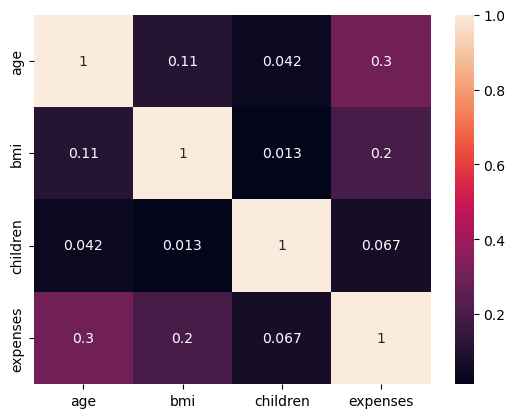

In [15]:
sns.heatmap(corr, annot=True)
plt.show()

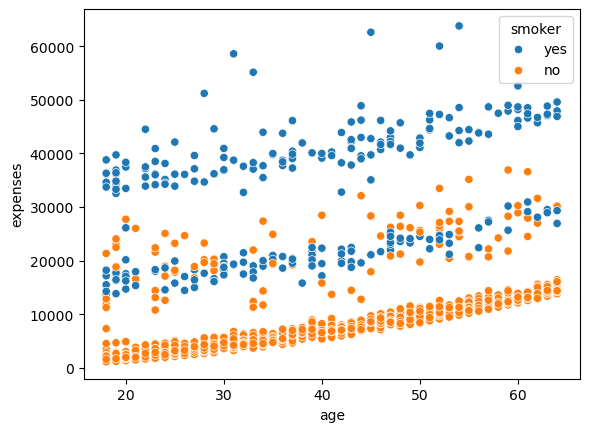

In [16]:
sns.scatterplot(x='age', y='expenses',data=data, hue='smoker')
plt.show()

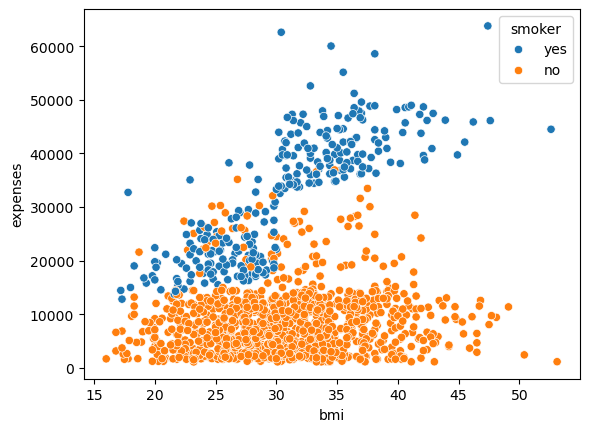

In [17]:
sns.scatterplot(x='bmi', y='expenses',data=data, hue='smoker')
plt.show()

## FEATURE TRANSFORMATION

In [18]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


In [19]:
data.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [20]:
data['sex_male'] = data['sex_male'].replace({True:1,False:0})
data['smoker_yes'] = data['smoker_yes'].replace({True:1,False:0})
data['region_northwest'] = data['region_northwest'].replace({True:1,False:0})
data['region_southeast'] = data['region_southeast'].replace({True:1,False:0})
data['region_southwest'] = data['region_southwest'].replace({True:1,False:0})
data.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [21]:
data.describe()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638,0.504862,0.204936,0.242334,0.272251,0.243082
std,14.044333,6.100664,1.205571,12110.359657,0.500163,0.403806,0.428655,0.445285,0.429104
min,18.000000,16.000000,0.000000,1121.870000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.300000,0.000000,4746.340000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9386.160000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.700000,2.000000,16657.720000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.100000,5.000000,63770.430000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# independent features
X = data.drop('expenses',axis=1)
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0


In [23]:
# dependent features
y = data.expenses
y.head() 

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1069, 8), (268, 8), (1069,), (268,))

## FEATURE SCALING

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_train_df = pd.DataFrame(X_train)
X_train_df.describe()

,0,1,2,3,4,5,6,7
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,0.463070,0.398148,0.215716,0.494855,0.202058,0.244153,0.265669,0.250702
std,0.306728,0.163604,0.240427,0.500208,0.401723,0.429785,0.441895,0.433620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.280323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.390836,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.506739,0.400000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
X_test = scaler.transform(X_test)
X_test_df = pd.DataFrame(X_test)
X_test_df.describe()

,0,1,2,3,4,5,6,7
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.454494,0.383926,0.232836,0.544776,0.216418,0.235075,0.298507,0.212687
std,0.300062,0.167552,0.243808,0.498923,0.412573,0.424839,0.458459,0.409973
min,0.000000,0.021563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.264151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.377358,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.701087,0.485849,0.400000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,0.986523,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Linear Reagression with Multiple Variables

In [29]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

LR_model.fit(X_train,y_train)

LinearRegression()

In [30]:
from sklearn.metrics import r2_score

LR_predict = LR_model.predict(X_test)

ACC_LR = r2_score(y_test, LR_predict)
print(f"Linear Regression model accuracy::{round(ACC_LR*100)}")
# LR_model.score(X_test,y_test)


Linear Regression model accuracy::75


# Support Vector Machine

In [31]:
from sklearn.svm import SVR
SVR_model = SVR(kernel='linear')
SVR_model.fit(X_train,y_train)

SVR(kernel='linear')

In [32]:
SVR_pred = SVR_model.predict(X_test)
ACC_SVR = r2_score(y_test, SVR_pred)
print(f"Suppor Vector Machine model accuracy::{round(ACC_SVR*100)}")
# SVR_model.score(X_test,y_test)


Suppor Vector Machine model accuracy::-11


# Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [34]:
DT_pred = DT_model.predict(X_test)
ACC_DT = r2_score(y_test, DT_pred)
print(f"Decision Tree Regressor model accuracy::{round(ACC_DT*100)}")
# DT_model.score(X_test,y_test)

Decision Tree Regressor model accuracy::71


# Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
RF_pred = RF_model.predict(X_test)
ACC_RF = r2_score(y_test, RF_pred)
print(f"Random Forest Regressor model accuracy::{round(ACC_RF*100)}")
# RF_model.score(X_test,y_test)

Random Forest Regressor model accuracy::84


# KNeighbours Regressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor
KN_model = KNeighborsRegressor()
KN_model.fit(X_train,y_train)

KNeighborsRegressor()

In [38]:
KN_pred = KN_model.predict(X_test)
ACC_KN = r2_score(y_test, KN_pred)
print(f"KNieghbors Regressor model accuracy::{round(ACC_KN*100)}")
# KN_model.score(X_test,y_test)

KNieghbors Regressor model accuracy::77


<Axes: >

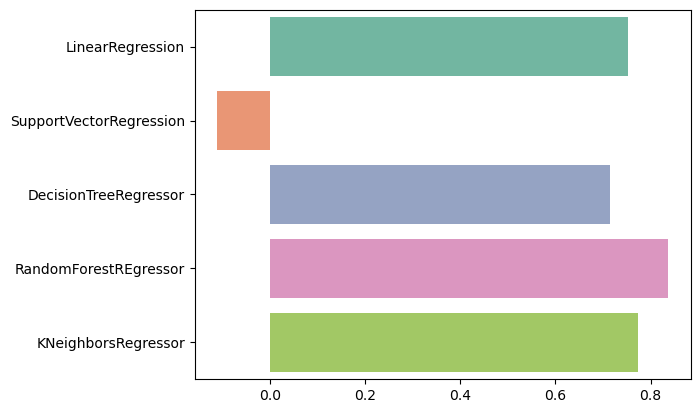

In [39]:
Accuracy = [ACC_LR,ACC_SVR,ACC_DT,ACC_RF,ACC_KN]
model_names=["LinearRegression","SupportVectorRegression","DecisionTreeRegressor","RandomForestREgressor","KNeighborsRegressor"]
sns.barplot(x=Accuracy,y=model_names, palette="Set2")

# Save Scaler And Model Parameters

In [40]:
import pickle

# save scaler parameters

file_name = 'New_scaler.pkl'
pickle.dump(scaler, open(file_name,'wb'))

# model parameters

file_name = 'New_RFmodel.pkl'
pickle.dump(RF_model, open(file_name,'wb'))

In [41]:
X_train

array([[0.54347826, 0.10781671, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.49595687, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10869565, 0.55795148, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.23913043, 0.57412399, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.02173913, 0.52560647, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.76086957, 0.28032345, 0.4       , ..., 0.        , 0.        ,
        0.        ]])